<a href="https://colab.research.google.com/github/JoshStrother/DataVisualization/blob/main/Lesson27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lets get out libraries and our data.


In [3]:
import pandas as pa
import matplotlib.pyplot as plt
import seaborn as sns

df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Viz/main/Activity_Dataset_V1.csv')

df.head()

,Unnamed: 0,activity_day,workout_type,distance,time,calories,total_steps,avg_speed,avg_cadence,max_cadence,...,max_pace,min_pace,avg_heart_rate,max_heart_rate,min_heart_rate,vo2_max(%),aerobic(%),anaerobic(%),intensive(%),light(%)
0,0,2022-01-01,Freestyle,9.30,77,123,NaN,18.88,168.54,138.30,...,NaN,NaN,112.5,122.0,103,19,28,2,7,50
1,1,2022-01-01,Freestyle,3.44,96,55,NaN,29.65,125.92,292.81,...,NaN,NaN,111.0,122.0,100,42,28,2,29,88
2,2,2022-01-01,Indoor Cycling,6.34,85,33,NaN,17.85,81.93,323.69,...,NaN,NaN,95.0,90.0,100,1,32,0,22,43
3,3,2022-01-01,Walking,7.91,42,82,1571.0,22.10,29.63,180.16,...,28:58,07:58,83.0,85.0,81,3,22,0,24,65
4,4,2022-01-01,Open Water,8.99,36,131,NaN,25.83,64.55,342.89,...,NaN,NaN,138.0,166.0,110,7,0,5,21,88


Now we are going to change the color scheme and the percents to values.
In order to achieve the actual values, I will use a lambda function that will divide the percents by 100 to get their decimal value then multiple that by the total number of workouts recorded. As for the color I will just change the palette.

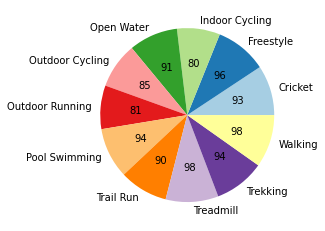

In [4]:
total = df.workout_type.agg('count')
colors = sns.color_palette("Paired")
ax = plt.pie(x=df.groupby('workout_type').workout_type.agg('count'),labels = df.groupby('workout_type').workout_type.agg('count').index, autopct=lambda p: '{:.0f}'.format(p /100 * total ), colors=colors )
plt.show()

Getting rid of the percentages and replacing with raw values worked pretty well.  The below code is my attempt to annotate the pie chart, but I got the same error several times and moved things around trying to get to the root of the issue but I failed.  I copied the annotate part from nurfnick github lesson27 just to see if the function its self would work and it did not, even after removing the text part.

AttributeError: ignored

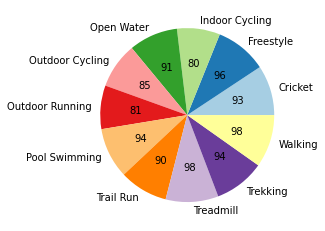

In [11]:
total = df.workout_type.agg('count')

colors = sns.color_palette("Paired")
ax = plt.pie(x=(df.groupby('workout_type').workout_type.agg('count')), labels = (df.groupby('workout_type').workout_type.agg('count').index) , autopct=lambda p: '{:.0f}'.format(p /100 * total ), colors=colors)
ax.annotate(
            xy = [8,100],
            arrowprops = dict(facecolor = 'red', width = 3, headwidth = 12, headlength = 6))
plt.show()

The mosiac plot can give us percentages of several groups at once as well as the totals.  The height is the percentage I believe and the width is the total or can be the total.  A mosiac plot can present a lot of information and maybe to much at times.  It gives us the combination between a pie chart and a bar chart.